# Introduction

This notebook is a final project for Exploratory Data Analysis for Machine Learning Course as a part of IBM Machine Learning Professional Specialization.

The goals here was to find a dataset and proceed some data cleaning, data exploration, data visualization together with some feature engineering.

I chosen a Kaggle dataset contains information about credit card fraud transaction.

[Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud/version/3#)

## Import libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from scipy.stats import shapiro
%matplotlib inline

## Load dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

In [3]:
print('This dataset contains:  {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This dataset contains:  284807 rows and 31 columns.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We can see that all our variables in this dataset are numerical and also there is no missing value.

Now, I would like to take closer look at two columns `Time` and `Amount` because only those two features have not been transformed with PCA. 

In [6]:
col_2 = ['Time', 'Amount']
df.loc[:, col_2].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


Firstly, we can notice that the range of transaction value is huge. The minimum value per transaction is 0 and the maximum is 25691 (amount is dollars). 

Secondly, is also clear that the average amount per transaction is 88 dollars. 

Feature `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset but to better understand this variable I will visualize it. 

C:\Users\pauli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Time Feature')

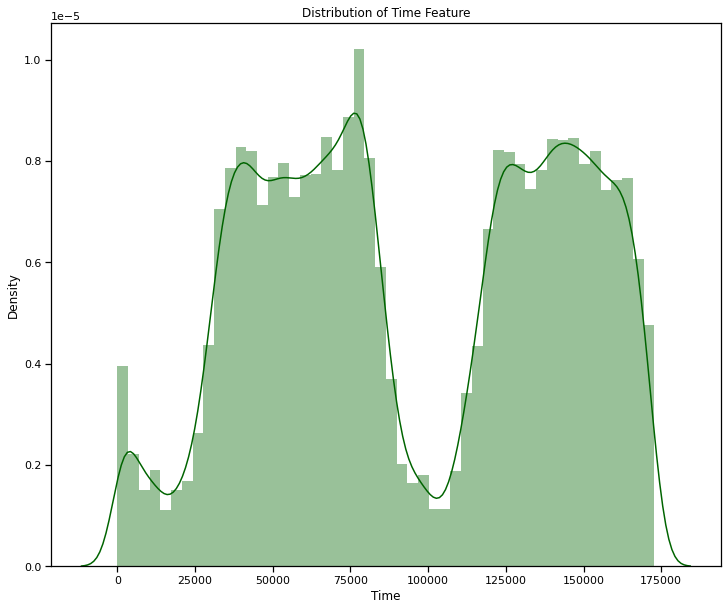

In [7]:
sns.set_context('notebook')
plt.figure(figsize=(12,10))
sns.distplot(df['Time'], color='darkgreen')
plt.title('Distribution of Time Feature')

Based on graph provided we can clearly see how distribution of `Time` feature looks like. It is clear that is a bimodal distribution with two peaks.

C:\Users\pauli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Amount Feature')

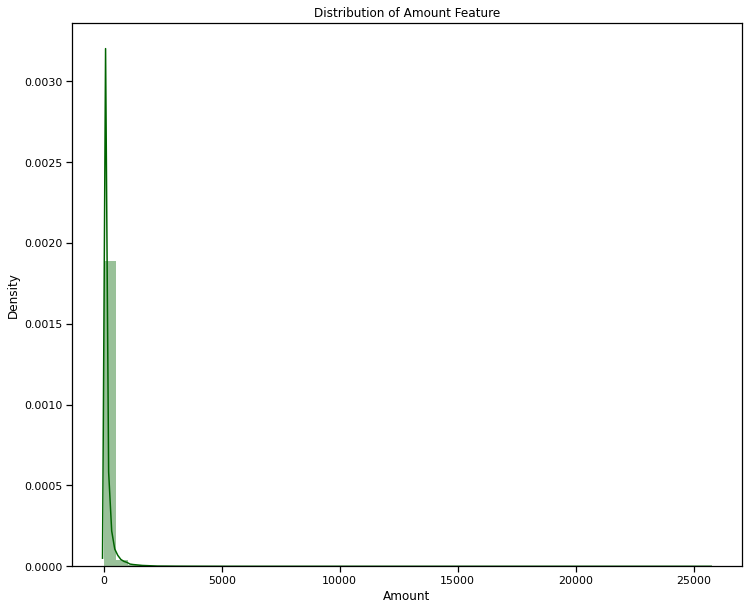

In [8]:
plt.figure(figsize=(12,10))
sns.distplot(df['Amount'], color='darkgreen')
plt.title('Distribution of Amount Feature')

The same graph for `Amount` feature shows that this is right-skewed distribution where mean > median. It is also clear for us that in this variable we have to deal with outliers. 

In [9]:
# fraud and non-fraud transaction
counts = df.Class.value_counts()
counts

0    284315
1       492
Name: Class, dtype: int64

In [10]:
normal = counts[0]
fraud = counts[1]

In [11]:
percent_normal = (normal / (normal + fraud)) * 100 
percent_fraud = (fraud / (normal + fraud)) * 100

In [12]:
print('There where {} non-fraud transactions ({:.3f}%) and {} fraud transactions ({:.3f}%)'
      .format(normal, percent_normal, fraud, percent_fraud))

There where 284315 non-fraud transactions (99.827%) and 492 fraud transactions (0.173%)


[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1000'),
 Text(0, 0, '10000'),
 Text(0, 0, '100000')]

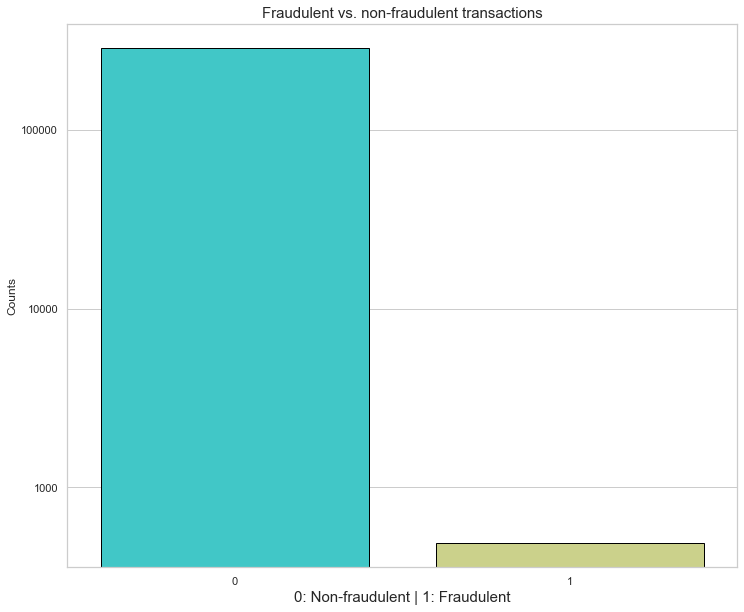

In [13]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,10))
ax = sns.barplot(x=counts.index, y=counts, edgecolor='black', palette='rainbow')
plt.title('Fraudulent vs. non-fraudulent transactions', size=15)
plt.xlabel('0: Non-fraudulent | 1: Fraudulent', size = 15)
plt.ylabel('Counts')
plt.yscale('log')
ax.set_yticklabels(('0', '0', '1000', '10000', '100000'))

To better understand how the proportion between fraudulent and non-fraudulent transaction looks like I decided to vizualize it by barplot graph. To make data more readable I used a logaritmic scale on y axis to at least point out the total amount of fraudulent transactions which are almost invisible using deafault y axis scale. 

In [15]:
# fraud and non-fraud transactions over time
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

Text(0.5, 1.0, 'Overall amount for fraud (1) and non-fraud (0) transactions')

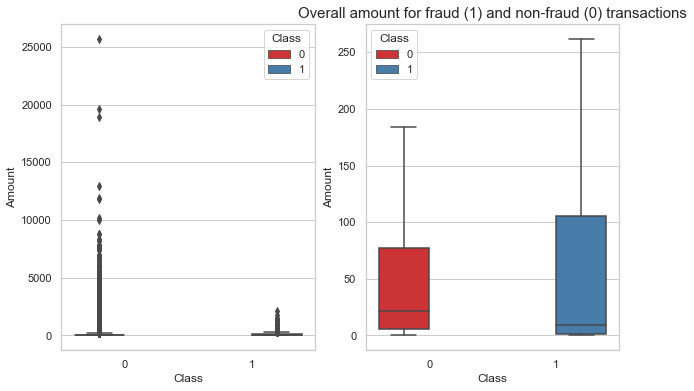

In [30]:
# transactions amount for fraud and non-fraud

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,6))
sns.boxplot(ax = ax1, x='Class', y='Amount', hue='Class', data=df, palette='Set1', showfliers=True)
sns.boxplot(ax = ax2, x='Class', y='Amount', hue='Class', data=df, palette='Set1', showfliers=False)
plt.title('Overall amount for fraud (1) and non-fraud (0) transactions', size=15)

In [26]:
small_df = df[['Amount', 'Class']].copy()
class_0 = small_df.loc[small_df['Class'] == 0]['Amount'] # class for non-fraud transactions
class_1 = small_df.loc[small_df['Class'] == 1]['Amount'] # class for fraudulent transactions 

In [28]:
class_0.describe().to_frame()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [29]:
class_1.describe().to_frame()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


The real transacions (non-fraudulent) have a larger mean and median, together with higher Q1, but smaller Q3 and have also larger outliers.

In [16]:
# correlation between variables

corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


Text(0.5, 1.0, 'Heatmap for all variables')

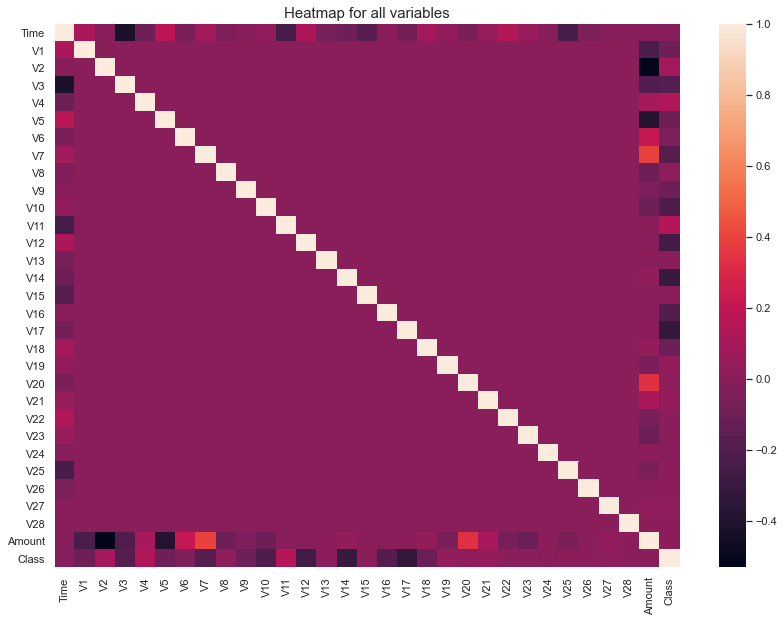

In [17]:
# heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr)
plt.title('Heatmap for all variables', size=15)

In [18]:
# check for skew

# Create a list of float colums to check for skewing
mask = df.dtypes == np.float
float_cols = df.columns[mask]
skew_vals = df[float_cols].skew()
skew_vals

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
dtype: float64

In [19]:
skew_limit = 0.75 # define a limit above which I will log transform

In [20]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
Amount,16.977724
V28,11.192091
V21,3.592991
V7,2.553907
V6,1.826581
V10,1.187141
V16,-1.100966
V27,-1.170209
V14,-1.995176
V20,-2.037155


Text(0.5, 0.98, 'Field "V28"')

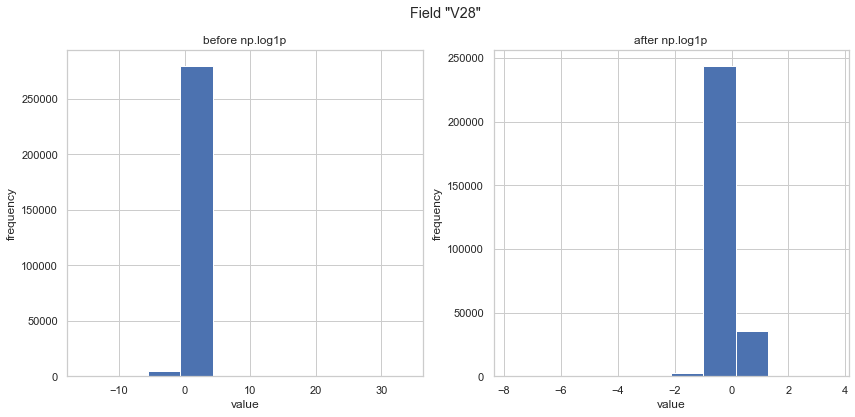

In [21]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = 'V28'

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(14, 6))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field))

In [27]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    df[col] = df[col].apply(np.log1p)

## Scaling Amount and Time

In [21]:
scaler = StandardScaler()
scaler2 = StandardScaler()

#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [22]:
#scaling amount
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [23]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
101182,67749.0,-1.761688,-0.430268,1.360538,-1.584443,NaN,0.750272,NaN,0.571832,0.183053,...,-0.537380,-0.288069,0.429682,-0.074090,0.298756,0.103259,0.693147,0,-1.484349,-0.569930
150588,93712.0,1.029700,0.307387,-1.058451,4.068177,0.445516,0.354410,0.075868,-0.116291,0.630207,...,0.052556,0.601393,0.121219,0.022338,-0.073481,-0.039946,4.329548,0,0.710689,-0.023203
24212,33119.0,0.702296,-0.588949,0.824072,0.657512,NaN,-0.517311,-1.129987,0.038359,0.725467,...,-0.119089,0.459730,0.157612,0.566153,-0.003204,0.046331,4.614328,0,0.882591,-1.299166
207825,136847.0,NaN,1.041299,NaN,-2.255929,1.346047,1.279368,0.282955,0.915131,-0.319406,...,-0.060897,0.741082,-0.068445,0.127942,0.393234,0.273855,0.887891,0,-1.366796,0.885131
51391,44922.0,-2.047697,0.420391,0.964533,0.890315,0.665489,0.332752,0.730671,-1.101565,-0.194444,...,-0.118746,-0.277238,-0.257313,-0.292272,-1.323276,-0.829520,3.365916,0,0.129012,-1.050619


In [24]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [25]:
df.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
233050,NaN,1.112708,-0.705964,-1.428968,0.157517,-0.323889,0.424307,0.347630,1.529731,0.925246,...,0.668112,-0.197363,0.721599,0.239269,0.084573,0.599710,0.328658,0,-1.146549,1.107902
109718,-0.455491,0.734435,0.803291,0.867853,0.132312,-1.824412,0.558234,-0.106938,-0.492603,-0.008616,...,0.461473,-0.150041,0.386209,-0.198937,-0.316247,0.345135,0.204319,0,-0.507437,-0.490731
20651,-0.682191,0.985936,0.463793,2.687090,0.247833,0.053120,0.292652,0.320868,-1.520382,0.610235,...,-1.290535,0.195098,-0.515501,-0.705176,-0.289697,0.095357,0.087193,0,-0.206189,-1.339913
110485,0.860189,-1.504260,0.498160,-0.990475,-2.255787,0.417467,NaN,0.260783,-0.542465,0.559818,...,1.104509,-0.192460,-0.776698,0.424044,0.016740,0.047137,0.001410,0,-1.075068,-0.483719
221837,NaN,0.634039,0.874898,0.973684,-0.242328,0.661694,0.279144,0.617682,-0.319656,-0.965074,...,-1.289110,0.131891,0.600019,0.397099,-0.832160,0.175303,0.066511,0,0.877063,1.008804


## Hypothesis Testing

One of hypothesis I can try to answer is if your data has a Gaussian distribution.

**H0:** the sample has a Gaussian distribution.

**H1:** the sample does not have a Gaussian distribution. 

Assumptions: 

* Observations in each sample are independent and identically distributed (iid).


The `shapiro()` SciPy function will calculate the Shapiro-Wilk on a given dataset. The function returns both the W-statistic calculated by the test and the p-value.

In [40]:
# Shapiro-Wilk Test

mask = df.dtypes == np.float
float_cols = df.columns[mask]
alpha = 0.05 # p-value

stat, p = shapiro(df[float_cols])

print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

stat=0.159, p=0.000
Sample does not look Gaussian (reject H0)


Two another hypothesis which could be further investigated include: 

1) Check if two samples are related
    * H0: the two samples are independent
    * H1: there is a dependency between the samples
2) Tests whether the means of two independent samples are significantly different
    * H0: the means of the samples are equal
    * H1: the means of the samples are unequal

One thing important to notice here is a fact that data in this dataset are highly imbalanced.

To work with future hypothesis testing or machine learning algorithms it seems to be a good idea to chose method which will help us with this imbalanced. One of the idea here is to use SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling method. 